# BERT / K-Means Embeddings Clustering

In [149]:
# Importar as bibliotecas necessárias

from transformers import BertTokenizer, BertModel
import torch
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carregar o tokenizer e o modelo BERT

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [162]:
# Frases para gerar embeddings

sentences = [
    ["astronomia", "estrelas", "galáxia"],
    ["música", "melodia", "ritmo"],
    ["computador", "programação", "software"],
    ["literatura", "livros", "autor"],
    ["esporte", "competição", "atleta"],
    ["arte", "pintura", "quadro"],
    ["culinária", "receita", "ingredientes"],
    ["viagem", "turismo", "aventura"],
    ["jardinagem", "plantas", "flores"],
    ["finanças", "investimento", "economia"]
]

In [163]:
# Função para gerar embeddings com BERT
def get_bert_embeddings(sentences):
    model.eval()
    embeddings = []
    with torch.no_grad():
        for sentence in sentences:
            inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128)
            outputs = model(**inputs)
            embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
    return np.array(embeddings)


# Gerar embeddings
embeddings = get_bert_embeddings([" ".join(sentence) for sentence in sentences])

Text(0.5, 1.0, 'Elbow Method para Determinar o Número Ótimo de Clusters')

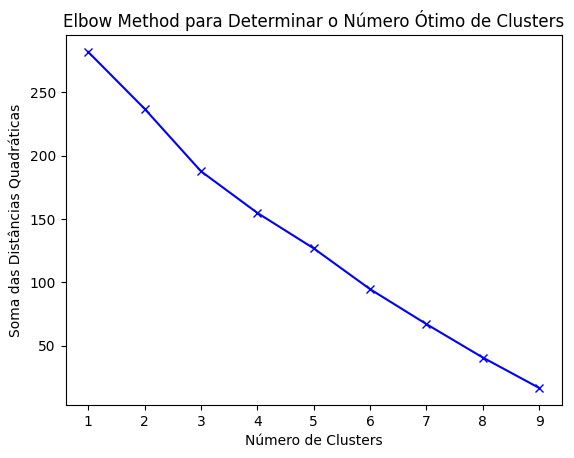

In [164]:
# Aplicar o Elbow Method

sum_of_squared_distances = []
K = range(1, 10)  # Testar para um número de clusters de 1 a 10
for k in K:
    km = KMeans(n_clusters=k, n_init='auto', random_state=0)
    km = km.fit(embeddings)
    sum_of_squared_distances.append(km.inertia_)

# Plotar o gráfico do método do cotovelo
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das Distâncias Quadráticas')
plt.title('Elbow Method para Determinar o Número Ótimo de Clusters')

In [89]:
# Normalizar os embeddings

normalized_embeddings = normalize(embeddings)

In [177]:
# Aplicar algoritmo K-Means nos embeddings

k = 3 # Número de k clusters
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(embeddings)

c:\Users\msanto22\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [178]:
# Mostrar os resultados

for i in range(k):
    print(f"Cluster {i}:")
    for j, cluster in enumerate(clusters):
        if cluster == i:
            print(" -", " ".join(sentences[j]))


Cluster 0:
 - música melodia ritmo
 - literatura livros autor
 - arte pintura quadro
Cluster 1:
 - astronomia estrelas galáxia
 - computador programação software
 - culinária receita ingredientes
 - viagem turismo aventura
 - jardinagem plantas flores
 - finanças investimento economia
Cluster 2:
 - esporte competição atleta


Ok

## Teste 2 - TSNE e Perplexity

In [179]:
# Frases para gerar embeddings

sentences = [
    "O céu está claro hoje, perfeito para observação de estrelas.",
    "A receita de bolo de chocolate é simples e deliciosa.",
    "A inteligência artificial está transformando muitas indústrias.",
    "Os atletas se preparam para a maratona olímpica.",
    "O museu de arte moderna inaugurou uma nova exposição.",
    "Investir em ações requer análise e estratégia.",
    "Os pandas são uma espécie ameaçada encontrada na China.",
    "A fotossíntese é um processo crucial para as plantas.",
    "Shakespeare é um dos maiores escritores da literatura inglesa.",
    "A aprendizagem de máquina é uma fascinante área da computação.",
    "O aquecimento global é um sério desafio ambiental.",
    "A culinária japonesa é conhecida por seu sushi e sashimi.",
    "A Lua é o único satélite natural da Terra.",
    "Jogar xadrez pode melhorar suas habilidades de pensamento estratégico.",
    "A Grande Barreira de Corais é um ecossistema marinho único."
]

In [180]:
# Função para gerar embeddings com BERT
def get_bert_embeddings(sentences):
    model.eval()
    embeddings = []
    with torch.no_grad():
        for sentence in sentences:
            inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128)
            outputs = model(**inputs)
            embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
    return np.array(embeddings)


# Gerar embeddings
embeddings = get_bert_embeddings([" ".join(sentence) for sentence in sentences])

Text(0.5, 1.0, 'Elbow Method para Determinar o Número Ótimo de Clusters')

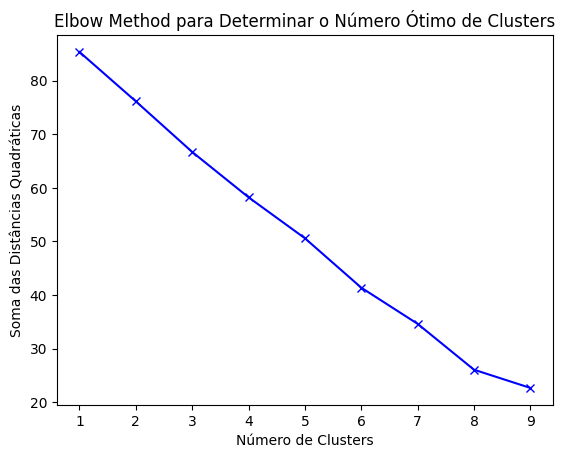

In [181]:
# Aplicar o Elbow Method

sum_of_squared_distances = []
K = range(1, 10)  # Testar para um número de clusters de 1 a 10
for k in K:
    km = KMeans(n_clusters=k, n_init='auto', random_state=0)
    km = km.fit(embeddings)
    sum_of_squared_distances.append(km.inertia_)

# Plotar o gráfico do método do cotovelo
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das Distâncias Quadráticas')
plt.title('Elbow Method para Determinar o Número Ótimo de Clusters')

In [231]:
# Número de amostras
n_samples = len(embeddings)

# Escolher um valor para perplexity menor que o número de amostras
perplexity_value = min(30, n_samples - 1)  # Exemplo: 30 ou menos

# Aplicar t-SNE nos embeddings
tsne = TSNE(n_components=2, perplexity=perplexity_value, learning_rate=50, random_state=0)
reduced_embeddings = tsne.fit_transform(embeddings)

In [232]:
# Aplicar algoritmo K-Means nos embeddings

k = 5  # Número de k clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)

clusters = kmeans.fit_predict(reduced_embeddings)

c:\Users\msanto22\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [233]:
# Mostrar os resultados

for i in range(k):
    print(f"Cluster {i}:")
    for j, cluster in enumerate(clusters):
        if cluster == i:
            print(" -", " ".join(sentences[j]))


Cluster 0:
 - A   i n t e l i g ê n c i a   a r t i f i c i a l   e s t á   t r a n s f o r m a n d o   m u i t a s   i n d ú s t r i a s .
 - O   m u s e u   d e   a r t e   m o d e r n a   i n a u g u r o u   u m a   n o v a   e x p o s i ç ã o .
 - A   a p r e n d i z a g e m   d e   m á q u i n a   é   u m a   f a s c i n a n t e   á r e a   d a   c o m p u t a ç ã o .
Cluster 1:
 - O   c é u   e s t á   c l a r o   h o j e ,   p e r f e i t o   p a r a   o b s e r v a ç ã o   d e   e s t r e l a s .
 - O s   p a n d a s   s ã o   u m a   e s p é c i e   a m e a ç a d a   e n c o n t r a d a   n a   C h i n a .
 - A   c u l i n á r i a   j a p o n e s a   é   c o n h e c i d a   p o r   s e u   s u s h i   e   s a s h i m i .
 - A   G r a n d e   B a r r e i r a   d e   C o r a i s   é   u m   e c o s s i s t e m a   m a r i n h o   ú n i c o .
Cluster 2:
 - O s   a t l e t a s   s e   p r e p a r a m   p a r a   a   m a r a t o n a   o l í m p i c a .
 - A   f o t o s s í n t e s 